# Introduction

This project explores the relationship between life expectancy and a range of socio-economic and health-related factors using statistical modeling techniques. Life expectancy is a critical indicator of a population’s overall well-being and is influenced not only by access to healthcare but also by education, income level, immunization coverage, and adult mortality. Understanding these relationships can help inform effective public health and development policies.

#Stakeholders for this analysis include:

Public health organizations such as WHO and CDC

Government policymakers working on healthcare, education, and economic development

Non-governmental organizations (NGOs) focused on global health and vaccination efforts

Researchers and data scientists studying demographic and health trends

Educators and students in statistics, data science, and public health programs

#Key Questions (Problem Definition)
How do socio-economic factors like education and GDP per capita impact life expectancy?

What role do health indicators like vaccination coverage and adult mortality play?

Can we build an accurate and interpretable model to predict life expectancy?

Are any variables (e.g., alcohol consumption) misleading due to correlation with economic status?

#Data Exploration

In [ ]:
# import libraries and tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import os
import statsmodels.api as sm

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# read csv into object
df = pd.read_csv('/content/gdrive/MyDrive/Life-Expectancy-Data-Updated.csv')

In [ ]:
# Create analysis function
def analyze(i):
  print('Here is an overview of the dataset:\n')
  print('The shape of the dataset is:', i.shape)
  print('The total null values in the dataset is:', (i.isnull().sum().sum()))
  print('\nHere is the head of the dataset:')
  return i.head()

In [ ]:
# Run function
analyze(df)

Here is an overview of the dataset:

The shape of the dataset is: (2864, 21)
The total null values in the dataset is: 0

Here is the head of the dataset:


,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.32,97,65,27.8,...,97,0.08,11006,78.53,4.9,4.8,7.8,0,1,76.5
1,Spain,European Union,2015,2.7,3.3,57.9025,10.35,97,94,26.0,...,97,0.09,25742,46.44,0.6,0.5,9.7,1,0,82.8
2,India,Asia,2007,51.5,67.9,201.0765,1.57,60,35,21.2,...,64,0.13,1076,1183.21,27.1,28.0,5.0,0,1,65.4
3,Guyana,South America,2006,32.8,40.5,222.1965,5.68,93,74,25.3,...,93,0.79,4146,0.75,5.7,5.5,7.9,0,1,67.0
4,Israel,Middle East,2012,3.4,4.3,57.9510,2.89,97,89,27.0,...,94,0.08,33995,7.91,1.2,1.1,12.8,1,0,81.7


In [ ]:
# Check column names
df.columns

Index(['Country', 'Region', 'Year', 'Infant_deaths', 'Under_five_deaths',
       'Adult_mortality', 'Alcohol_consumption', 'Hepatitis_B', 'Measles',
       'BMI', 'Polio', 'Diphtheria', 'Incidents_HIV', 'GDP_per_capita',
       'Population_mln', 'Thinness_ten_nineteen_years',
       'Thinness_five_nine_years', 'Schooling', 'Economy_status_Developed',
       'Economy_status_Developing', 'Life_expectancy'],
      dtype='object')

In [ ]:
# View info about each of the columns/features in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2864 entries, 0 to 2863
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      2864 non-null   object 
 1   Region                       2864 non-null   object 
 2   Year                         2864 non-null   int64  
 3   Infant_deaths                2864 non-null   float64
 4   Under_five_deaths            2864 non-null   float64
 5   Adult_mortality              2864 non-null   float64
 6   Alcohol_consumption          2864 non-null   float64
 7   Hepatitis_B                  2864 non-null   int64  
 8   Measles                      2864 non-null   int64  
 9   BMI                          2864 non-null   float64
 10  Polio                        2864 non-null   int64  
 11  Diphtheria                   2864 non-null   int64  
 12  Incidents_HIV                2864 non-null   float64
 13  GDP_per_capita    

In [ ]:
# Check for missing or null values
print("Number of missing values in dataset's columns:\n", df.isna().sum())
print("\nThere are null values in this dataset?: ", df.isnull().any().any())


Number of missing values in dataset's columns:
 Country                        0
Region                         0
Year                           0
Infant_deaths                  0
Under_five_deaths              0
Adult_mortality                0
Alcohol_consumption            0
Hepatitis_B                    0
Measles                        0
BMI                            0
Polio                          0
Diphtheria                     0
Incidents_HIV                  0
GDP_per_capita                 0
Population_mln                 0
Thinness_ten_nineteen_years    0
Thinness_five_nine_years       0
Schooling                      0
Economy_status_Developed       0
Economy_status_Developing      0
Life_expectancy                0
dtype: int64

There are null values in this dataset?:  False


In [ ]:
# View dataset's stats
df.describe()


,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
count,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000
mean,2007.500000,30.363792,42.938268,192.251775,4.820882,84.292598,77.344972,25.032926,86.499651,86.271648,0.894288,11540.924930,36.675915,4.865852,4.899825,7.632123,0.206704,0.793296,68.856075
std,4.610577,27.538117,44.569974,114.910281,3.981949,15.995511,18.659693,2.193905,15.080365,15.534225,2.381389,16934.788931,136.485867,4.438234,4.525217,3.171556,0.405012,0.405012,9.405608
min,2000.000000,1.800000,2.300000,49.384000,0.000000,12.000000,10.000000,19.800000,8.000000,16.000000,0.010000,148.000000,0.080000,0.100000,0.100000,1.100000,0.000000,0.000000,39.400000
25%,2003.750000,8.100000,9.675000,106.910250,1.200000,78.000000,64.000000,23.200000,81.000000,81.000000,0.080000,1415.750000,2.097500,1.600000,1.600000,5.100000,0.000000,1.000000,62.700000
50%,2007.500000,19.600000,23.100000,163.841500,4.020000,89.000000,83.000000,25.500000,93.000000,93.000000,0.150000,4217.000000,7.850000,3.300000,3.400000,7.800000,0.000000,1.000000,71.400000
75%,2011.250000,47.350000,66.000000,246.791375,7.777500,96.000000,93.000000,26.400000,97.000000,97.000000,0.460000,12557.000000,23.687500,7.200000,7.300000,10.300000,0.000000,1.000000,75.400000
max,2015.000000,138.100000,224.900000,719.360500,17.870000,99.000000,99.000000,32.100000,99.000000,99.000000,21.680000,112418.000000,1379.860000,27.700000,28.600000,14.100000,1.000000,1.000000,83.800000


In [ ]:
# Create objects for categorical, datetime, and continuous columns
cat_cols = []
dt_cols = []
cont_cols = []

# Use for loop to append lists with appropriate columns from dataframe
for i in df.columns:
  # if datatype is object, add to categorical list
  if df[i].dtype == 'O':
    cat_cols.append(i)
  # if datatype is datetime, add to datetime list
  elif df[i].dtype == 'datetime64[ns]':
    dt_cols.append(i)
  # otherwise, add to continuous list
  else:
    cont_cols.append(i)

# Print the number and names of the categorical and continuous columns
print(f"There are {len(cat_cols)} categorical columns: \n", cat_cols)
print("")
print(f"There are {len(dt_cols)} datetime columns: \n", dt_cols)
print("")
print(f"There are {len(cont_cols)} continuous columns: \n", cont_cols)

There are 2 categorical columns: 
 ['Country', 'Region']

There are 0 datetime columns: 
 []

There are 19 continuous columns: 
 ['Year', 'Infant_deaths', 'Under_five_deaths', 'Adult_mortality', 'Alcohol_consumption', 'Hepatitis_B', 'Measles', 'BMI', 'Polio', 'Diphtheria', 'Incidents_HIV', 'GDP_per_capita', 'Population_mln', 'Thinness_ten_nineteen_years', 'Thinness_five_nine_years', 'Schooling', 'Economy_status_Developed', 'Economy_status_Developing', 'Life_expectancy']


In [ ]:
df.describe()
df.info()
df['Country'].nunique(), df['Region'].unique()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2864 entries, 0 to 2863
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      2864 non-null   object 
 1   Region                       2864 non-null   object 
 2   Year                         2864 non-null   int64  
 3   Infant_deaths                2864 non-null   float64
 4   Under_five_deaths            2864 non-null   float64
 5   Adult_mortality              2864 non-null   float64
 6   Alcohol_consumption          2864 non-null   float64
 7   Hepatitis_B                  2864 non-null   int64  
 8   Measles                      2864 non-null   int64  
 9   BMI                          2864 non-null   float64
 10  Polio                        2864 non-null   int64  
 11  Diphtheria                   2864 non-null   int64  
 12  Incidents_HIV                2864 non-null   float64
 13  GDP_per_capita    

(179,
 array(['Middle East', 'European Union', 'Asia', 'South America',
        'Central America and Caribbean', 'Rest of Europe', 'Africa',
        'Oceania', 'North America'], dtype=object))

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = df.select_dtypes(include='number')


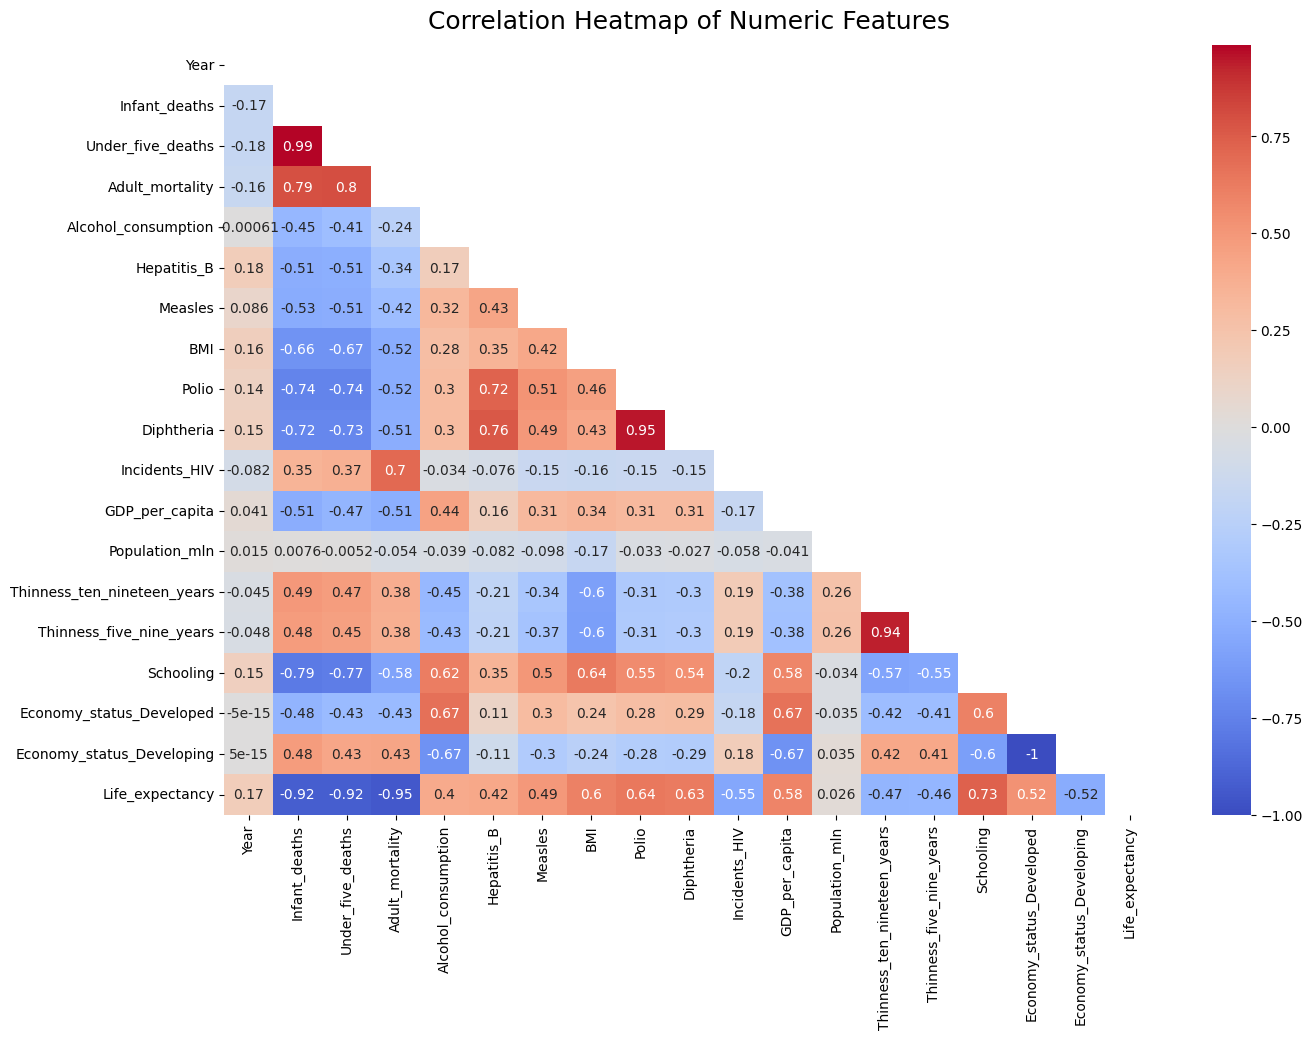

In [ ]:
# Create a correlation heatmap
# Create object for graph
df_cor = numeric_df.corr()

# Remove half of heatmap to reduce visual clutter
mask = np.zeros(df_cor.shape, dtype = bool)
mask[np.triu_indices(len(mask))] = True

# Graph the heatmap
plt.subplots(figsize = (15,10))
cor_heatmap = sns.heatmap(df_cor, xticklabels = df_cor.columns, yticklabels = df_cor.columns,
                          annot = True, annot_kws={'size': 10}, cmap = 'coolwarm', mask = mask)
cor_heatmap.set_title('Correlation Heatmap of Numeric Features', fontdict={'fontsize':18}, pad=12)

plt.savefig('Heatmap1.png', bbox_inches = 'tight')

<Axes: xlabel='Life_expectancy', ylabel='Count'>

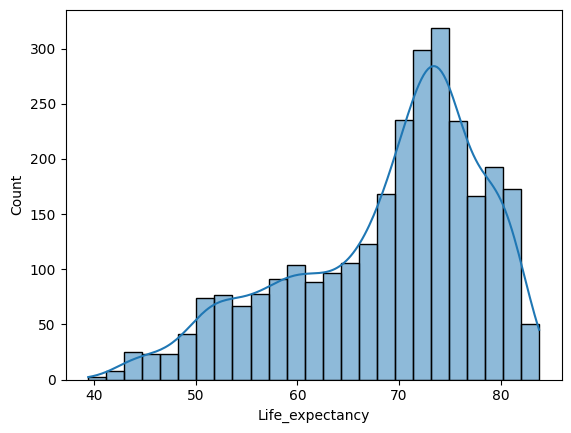

In [ ]:
sns.histplot(df['Life_expectancy'], kde=True)


<ipython-input-16-807b2512801e>:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


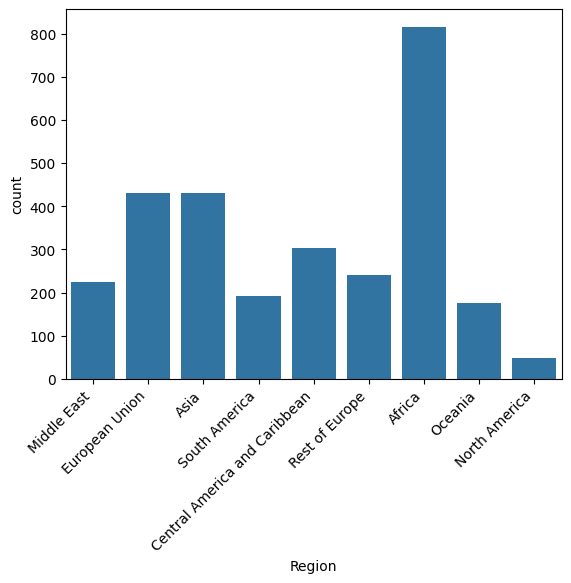

In [ ]:
ax = sns.countplot(x='Region', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.savefig('Region.png', bbox_inches = 'tight')

In [ ]:
# create a function to display histogram and box plot
def combo_box_hist(column, df):
    # creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

    # assigning a graph to each ax
    sns.boxplot(x = df[column], ax=ax_box).set(title = f"Box Plot and Histogram of {column}")
    sns.histplot(data=df, x=column, ax=ax_hist, kde=True)

    # Remove x axis name for the boxplot
    ax_box.set(xlabel='')
    plt.savefig(f'Box Plot and Histogram of {column}.png', bbox_inches = 'tight')
    plt.show()

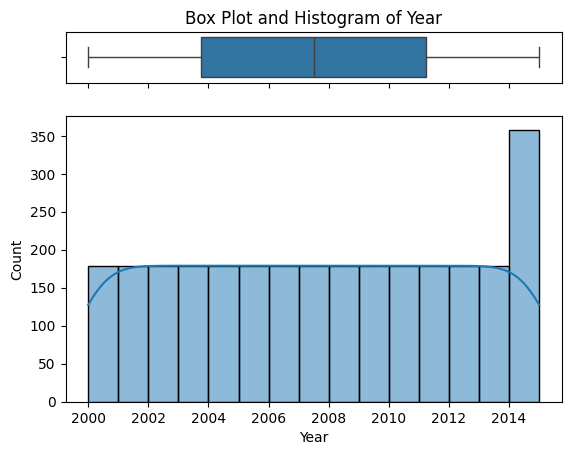

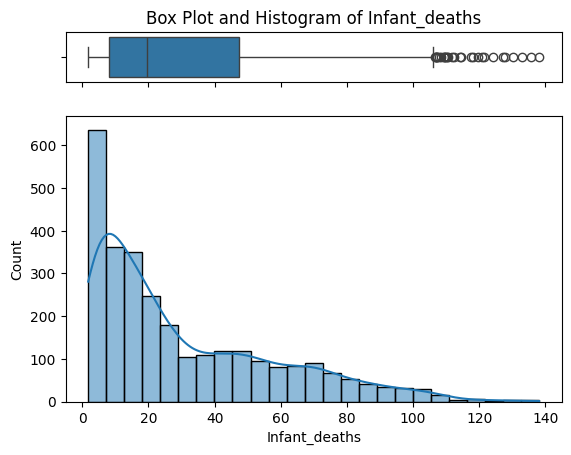

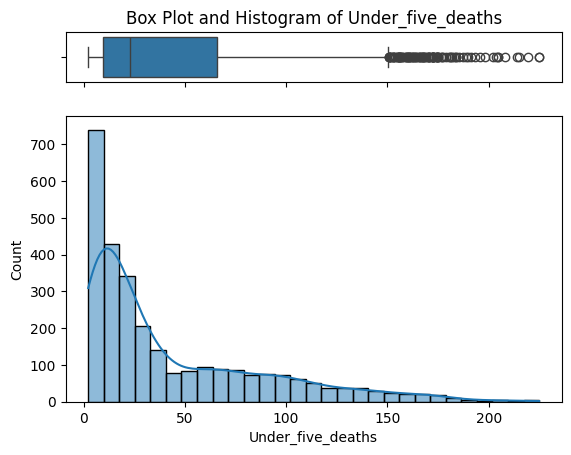

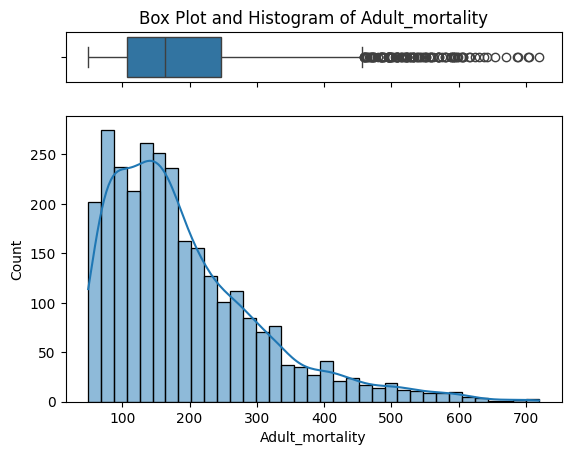

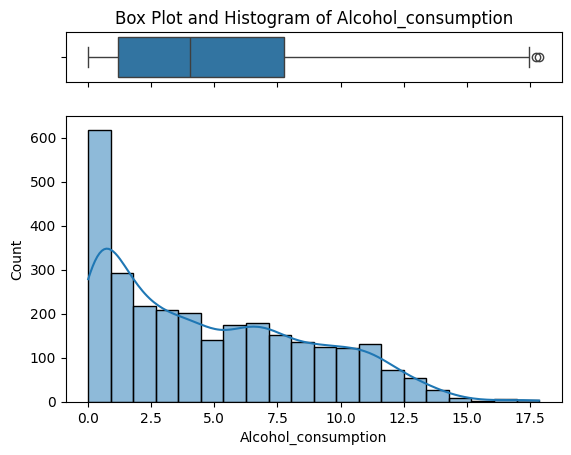

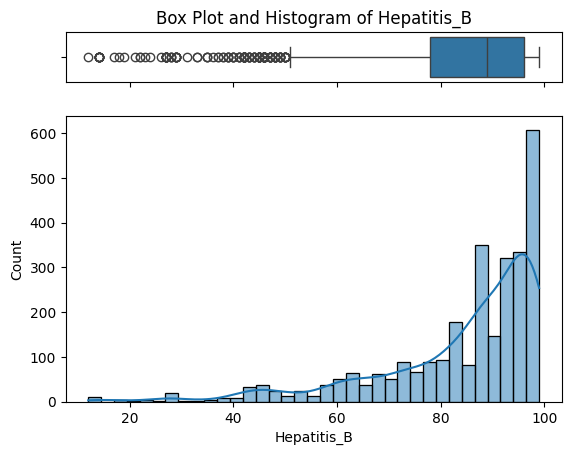

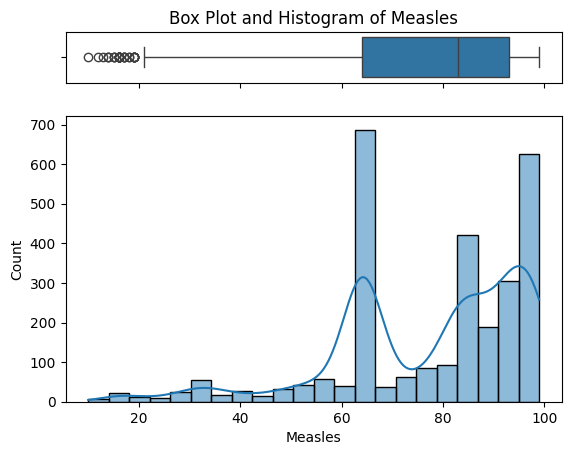

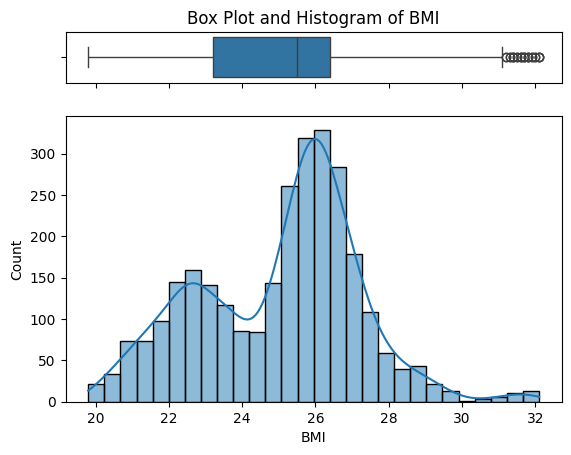

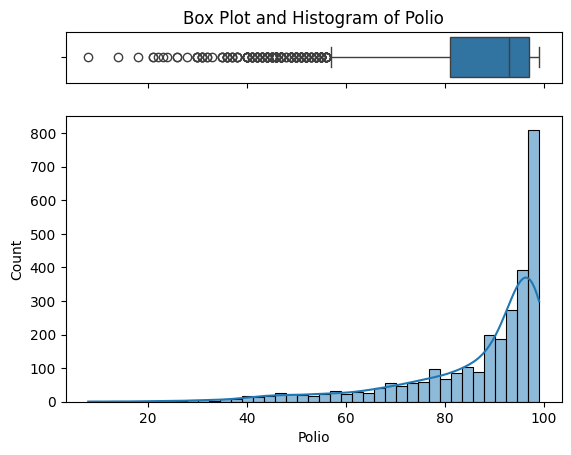

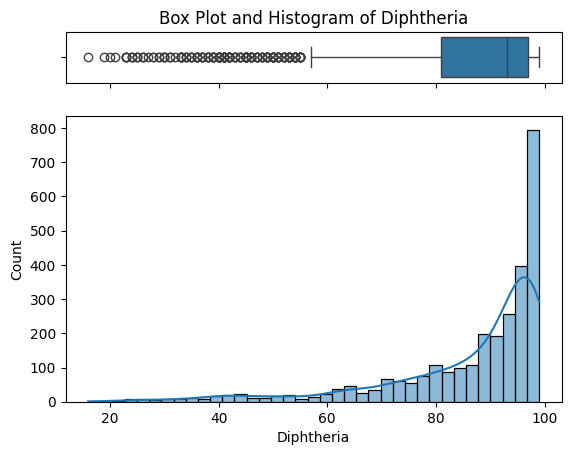

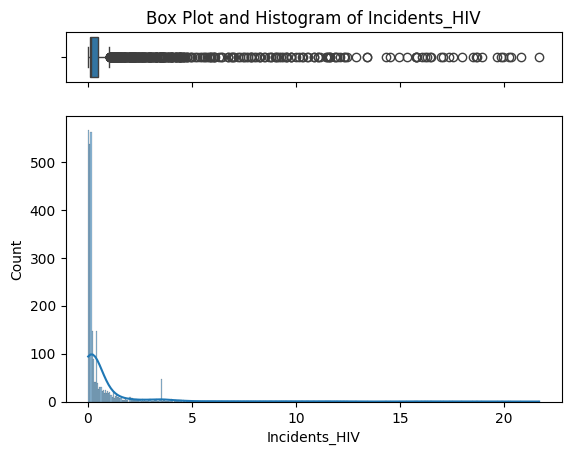

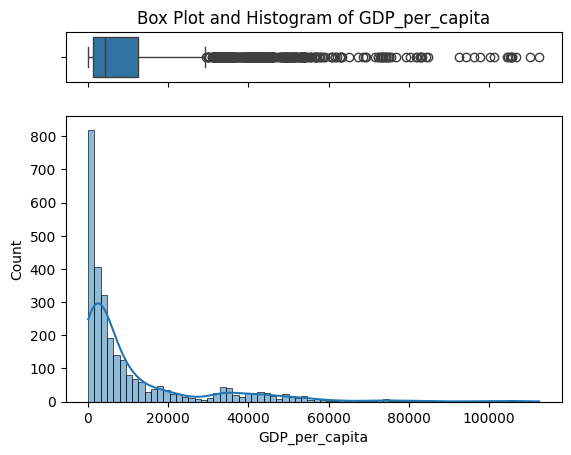

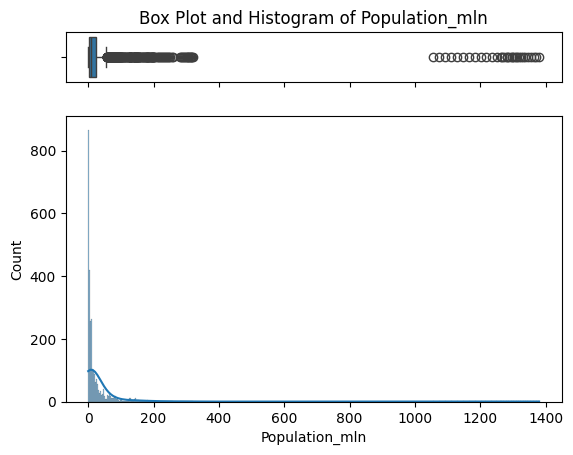

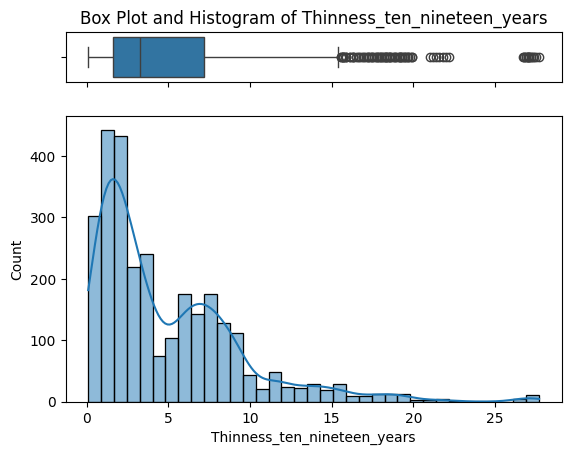

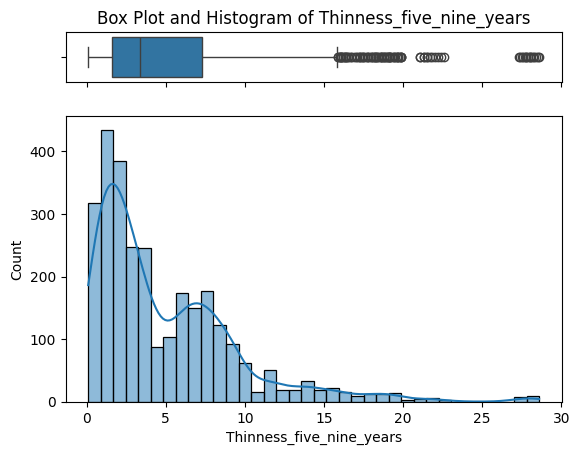

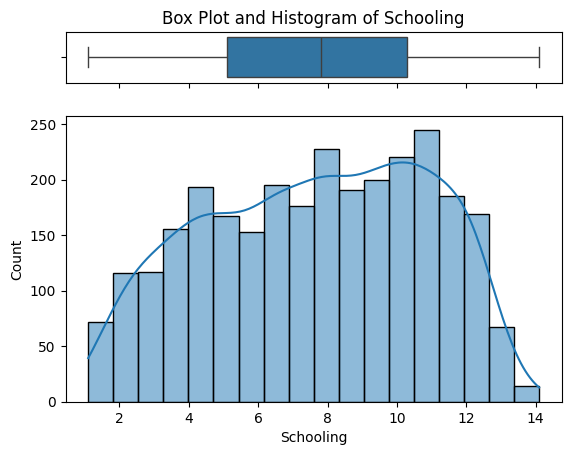

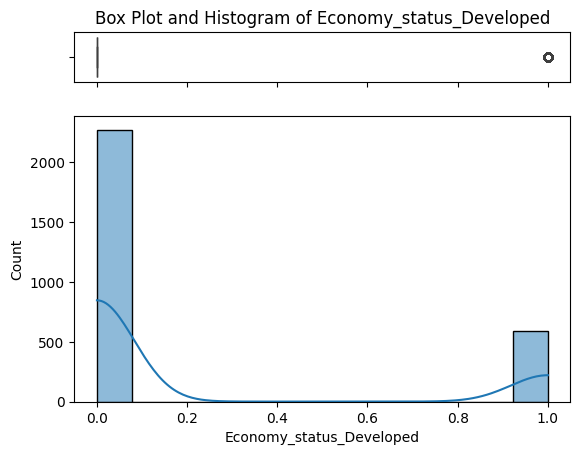

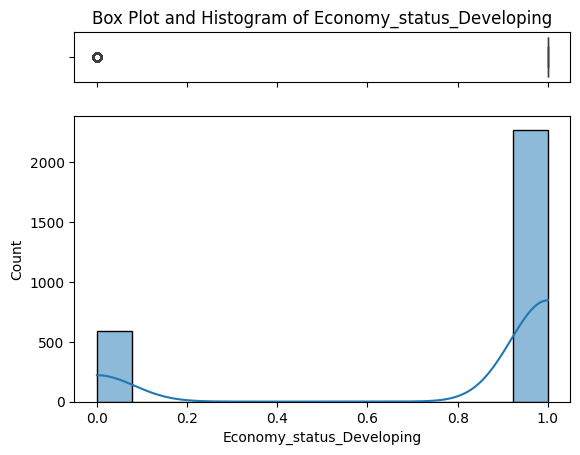

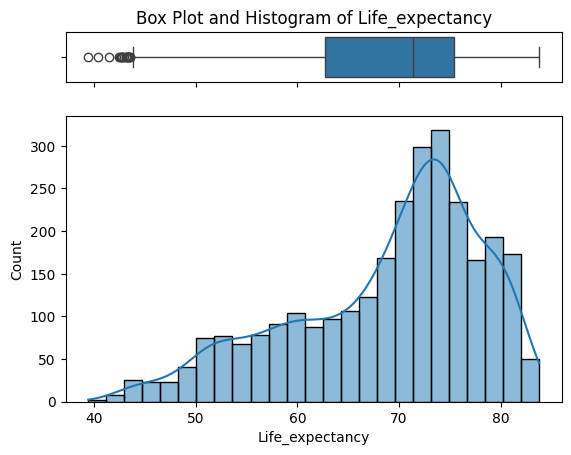

In [ ]:
# Run for loop to see combined histogram/box plot of all continuous variables
for i in cont_cols:
    combo_box_hist(i, df)

In [ ]:
df_interesting = df[['Polio', 'Adult_mortality', 'Alcohol_consumption', 'GDP_per_capita', 'Schooling', 'Life_expectancy']]
df_interesting.corr()

,Polio,Adult_mortality,Alcohol_consumption,GDP_per_capita,Schooling,Life_expectancy
Polio,1.000000,-0.524226,0.301926,0.313786,0.552765,0.641217
Adult_mortality,-0.524226,1.000000,-0.244794,-0.510121,-0.581035,-0.945360
Alcohol_consumption,0.301926,-0.244794,1.000000,0.443966,0.615728,0.399159
GDP_per_capita,0.313786,-0.510121,0.443966,1.000000,0.580626,0.583090
Schooling,0.552765,-0.581035,0.615728,0.580626,1.000000,0.732484
Life_expectancy,0.641217,-0.945360,0.399159,0.583090,0.732484,1.000000


In [ ]:
df_interesting.describe()

,Polio,Adult_mortality,Alcohol_consumption,GDP_per_capita,Schooling,Life_expectancy
count,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000
mean,86.499651,192.251775,4.820882,11540.924930,7.632123,68.856075
std,15.080365,114.910281,3.981949,16934.788931,3.171556,9.405608
min,8.000000,49.384000,0.000000,148.000000,1.100000,39.400000
25%,81.000000,106.910250,1.200000,1415.750000,5.100000,62.700000
50%,93.000000,163.841500,4.020000,4217.000000,7.800000,71.400000
75%,97.000000,246.791375,7.777500,12557.000000,10.300000,75.400000
max,99.000000,719.360500,17.870000,112418.000000,14.100000,83.800000


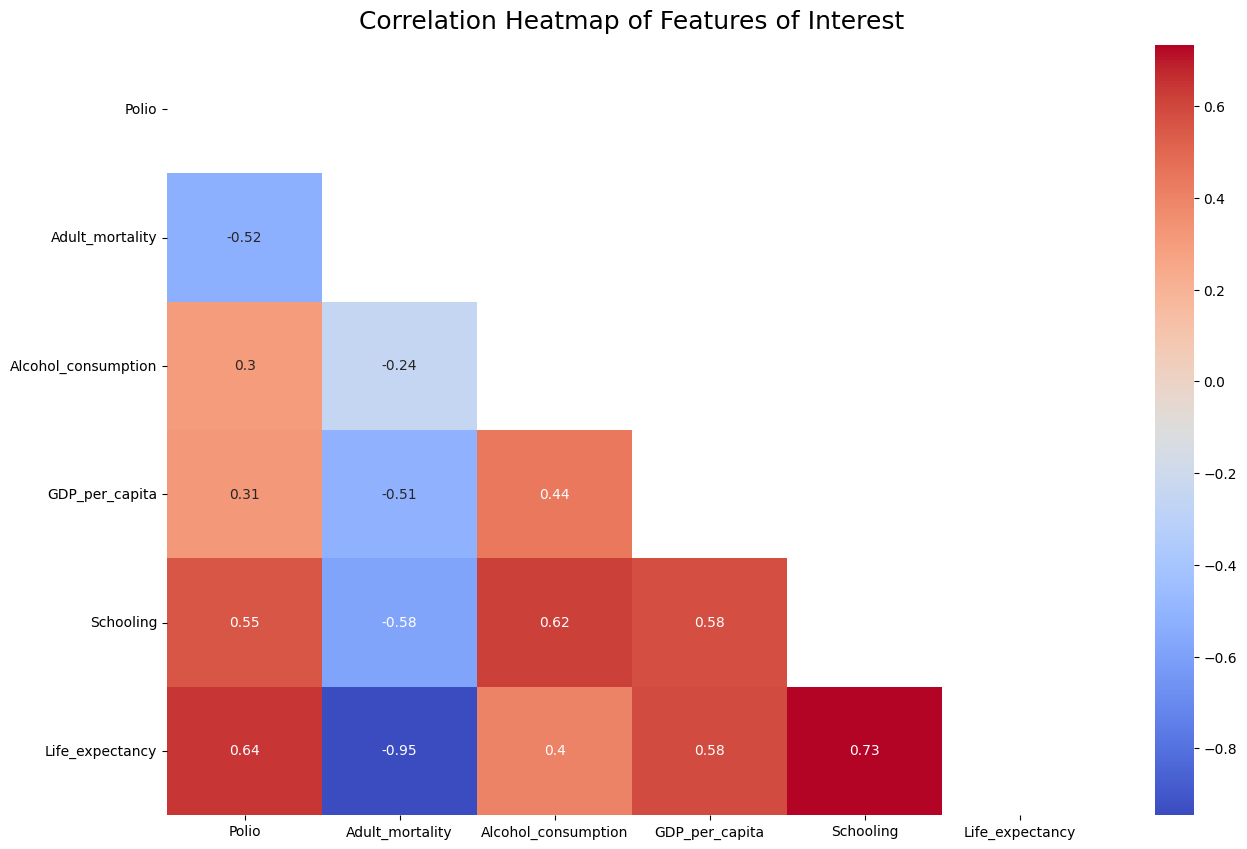

In [ ]:
# Create a correlation heatmap
# Create object for graph
df_interesting_cor = df_interesting.corr()

# Remove half of heatmap to reduce visual clutter
mask = np.zeros(df_interesting_cor.shape, dtype = bool)
mask[np.triu_indices(len(mask))] = True

# Graph the heatmap
plt.subplots(figsize = (15,10))
cor_heatmap2 = sns.heatmap(df_interesting_cor, xticklabels = df_interesting_cor.columns, yticklabels = df_interesting_cor.columns,
                          annot = True, annot_kws={'size': 10}, cmap = 'coolwarm', mask = mask)
cor_heatmap2.set_title('Correlation Heatmap of Features of Interest', fontdict={'fontsize':18}, pad=12)

plt.savefig('Heatmap2.png', bbox_inches = 'tight')

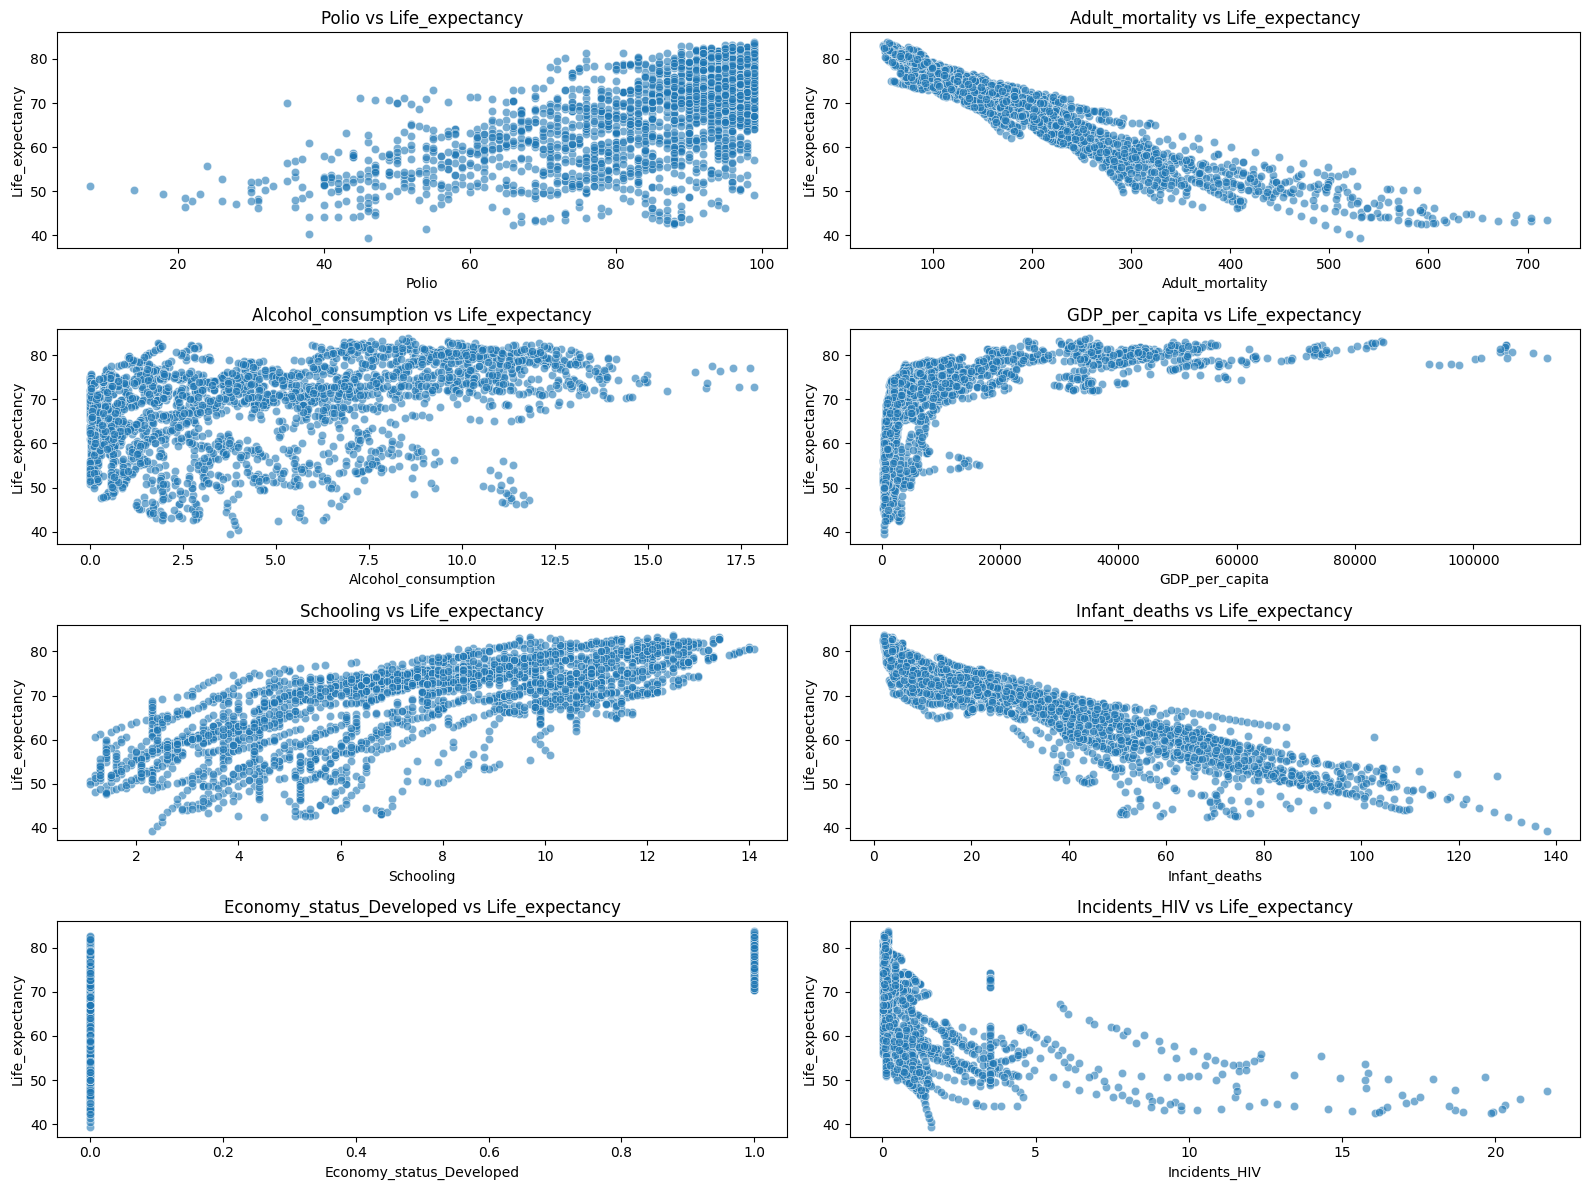

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

features = ['Polio', 'Adult_mortality', 'Alcohol_consumption', 'GDP_per_capita', 'Schooling',
            'Infant_deaths', 'Economy_status_Developed', 'Incidents_HIV']
target = 'Life_expectancy'

fig, axes = plt.subplots(4, 2, figsize=(16, 12))

for i, feature in enumerate(features):
    row, col = divmod(i, 2)
    sns.scatterplot(data=df, x=feature, y=target, alpha=0.6, ax=axes[row][col])
    axes[row][col].set_title(f'{feature} vs {target}')
    axes[row][col].set_xlabel(feature)
    axes[row][col].set_ylabel(target)

plt.tight_layout()
fig.savefig("scatter_plots_life_expectancy.jpg", format='jpg')


#Data Modelling

#Simple Liner Regression

=== Simple Linear Regression ===
R² Score: 0.5000681436736123
MAE: 5.182358357809687
MSE: 41.489946585991305
RMSE: 6.441269019843164


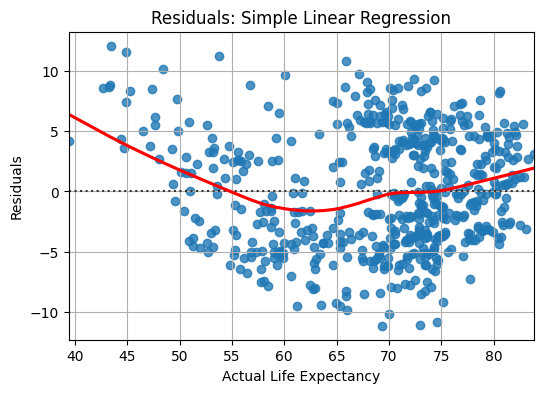

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


X_simple = df[['Schooling']]
y = df['Life_expectancy']

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_simple, y, test_size=0.2, random_state=42)

slr = LinearRegression()
slr.fit(X_train_s, y_train_s)
y_pred_s = slr.predict(X_test_s)

print("=== Simple Linear Regression ===")
print("R² Score:", r2_score(y_test_s, y_pred_s))
print("MAE:", mean_absolute_error(y_test_s, y_pred_s))
print("MSE:", mean_squared_error(y_test_s, y_pred_s))
print("RMSE:", np.sqrt(mean_squared_error(y_test_s, y_pred_s)))

plt.figure(figsize=(6,4))
sns.residplot(x=y_test_s, y=y_pred_s, lowess=True, line_kws={'color': 'red'})
plt.title('Residuals: Simple Linear Regression')
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()


<ipython-input-24-3833c0c072e9>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test_s - y_pred_s), bins = 16)


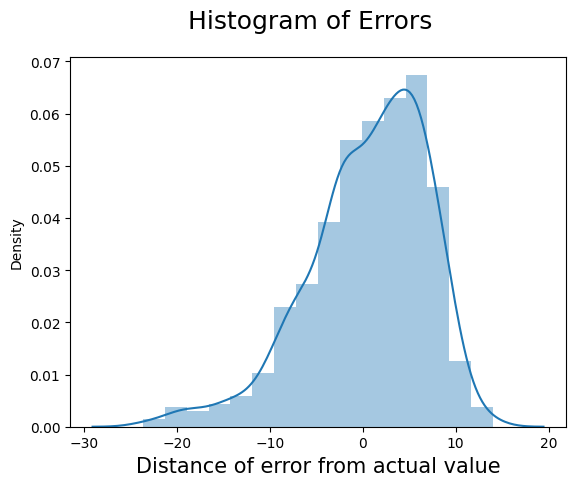

In [ ]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_test_s - y_pred_s), bins = 16)
fig.suptitle('Histogram of Errors', fontsize = 18)
# Plot heading
plt.xlabel('Distance of error from actual value', fontsize = 15)
plt.savefig('HistofErr_Simp.png', bbox_inches = 'tight')

In [ ]:
# Let's check the training group with statsmodel
sm_X_s = X_train_s
sm_Y_s = y_train_s
sm_X_s = sm.add_constant(sm_X_s)
model_s = sm.OLS(sm_Y_s, sm_X_s).fit()
print(model_s.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_expectancy   R-squared:                       0.545
Model:                            OLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                     2738.
Date:                Tue, 20 May 2025   Prob (F-statistic):               0.00
Time:                        15:51:25   Log-Likelihood:                -7501.3
No. Observations:                2291   AIC:                         1.501e+04
Df Residuals:                    2289   BIC:                         1.502e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         52.0236      0.347    149.792      0.0

In [ ]:
sm_X_test_s = X_test_s
sm_Y_test_s = y_test_s
sm_X_test_s = sm.add_constant(sm_X_test_s)
model_s = sm.OLS(sm_Y_test_s, sm_X_test_s).fit()
print(model_s.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_expectancy   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.504
Method:                 Least Squares   F-statistic:                     582.1
Date:                Tue, 20 May 2025   Prob (F-statistic):           3.33e-89
Time:                        15:51:25   Log-Likelihood:                -1877.6
No. Observations:                 573   AIC:                             3759.
Df Residuals:                     571   BIC:                             3768.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         53.2780      0.708     75.231      0.0

A simple linear regression model using Schooling as the sole predictor explained about 50% of the variance in life expectancy (R² = 0.50). The model had an RMSE of 6.44 years, indicating moderate predictive power. While Schooling showed a positive relationship with life expectancy, the model's limited scope suggests that additional factors are needed for stronger predictions.


# Multiple Linear Regression

=== Multiple Linear Regression ===
R² Score: 0.9507394775075159
MAE: 1.6047440302231284
MSE: 4.088190062600964
RMSE: 2.0219273138767786

Feature Coefficients:
                Feature  Coefficient
0                Polio     0.079656
1      Adult_mortality    -0.060829
2  Alcohol_consumption     0.135752
3       GDP_per_capita     0.000021
4            Schooling     0.510771


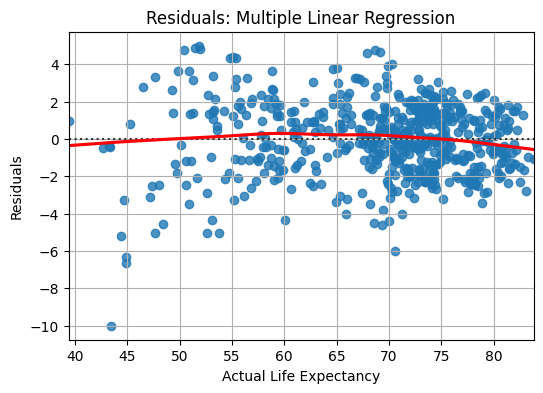

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

features = ['Polio', 'Adult_mortality', 'Alcohol_consumption', 'GDP_per_capita', 'Schooling']
X_multi = df[features]
y = df['Life_expectancy']

X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_multi, y, test_size=0.2, random_state=42)

mlr = LinearRegression()
mlr.fit(X_train_m, y_train_m)
y_pred_m = mlr.predict(X_test_m)

print("=== Multiple Linear Regression ===")
print("R² Score:", r2_score(y_test_m, y_pred_m))
print("MAE:", mean_absolute_error(y_test_m, y_pred_m))
print("MSE:", mean_squared_error(y_test_m, y_pred_m))
print("RMSE:", np.sqrt(mean_squared_error(y_test_m, y_pred_m)))
coeff_df = pd.DataFrame({'Feature': features, 'Coefficient': mlr.coef_})
print("\nFeature Coefficients:\n", coeff_df)
plt.figure(figsize=(6,4))
sns.residplot(x=y_test_m, y=y_pred_m, lowess=True, line_kws={'color': 'red'})
plt.title('Residuals: Multiple Linear Regression')
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()


<ipython-input-28-27ab180830cb>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test_m - y_pred_m), bins = 16)


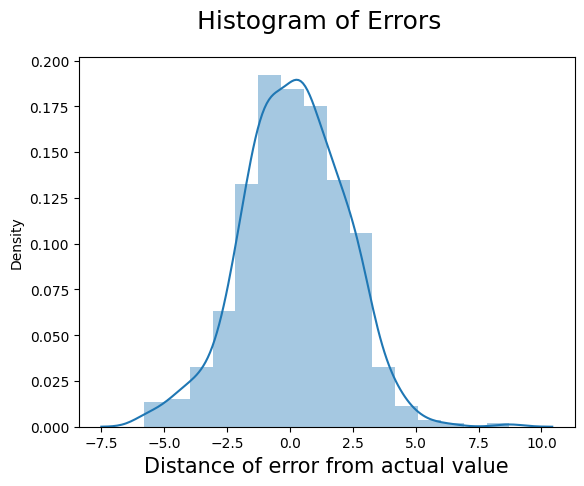

In [ ]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_test_m - y_pred_m), bins = 16)
fig.suptitle('Histogram of Errors', fontsize = 18)
# Plot heading
plt.xlabel('Distance of error from actual value', fontsize = 15)
plt.savefig('HistofErr.png', bbox_inches = 'tight')

<ipython-input-29-5b0281df96f8>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(RedPlot, hist = False, color = 'r', label = RedName)
<ipython-input-29-5b0281df96f8>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = sns.distplot(BluePlot, hist = False, color = 'b', label = BlueNa

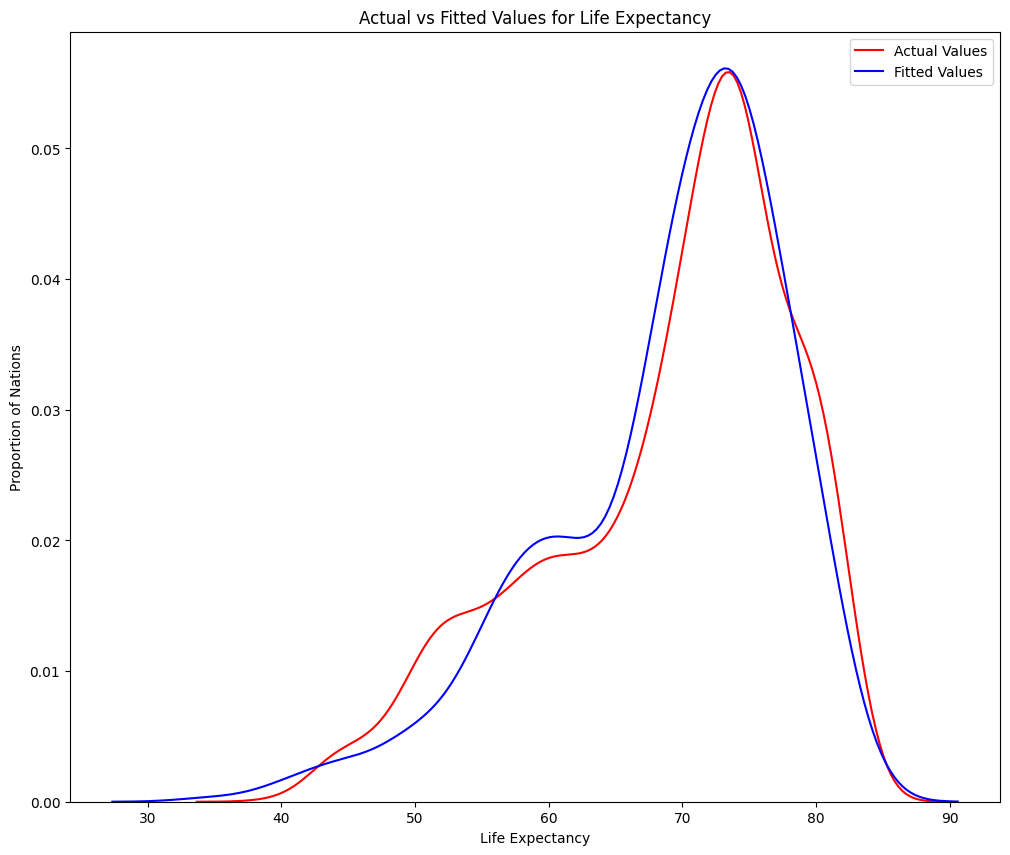

In [ ]:
# Create a function for graphing distribution plots
def DistributionPlot(RedPlot, BluePlot, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize = (width, height))
    ax1 = sns.distplot(RedPlot, hist = False, color = 'r', label = RedName)
    ax2 = sns.distplot(BluePlot, hist = False, color = 'b', label = BlueName, ax = ax1)
    plt.title(Title)
    plt.xlabel('Life Expectancy')
    plt.ylabel('Proportion of Nations')
    plt.legend()

    plt.show()
    plt.close()

# Graph distribution plot for this multiple linear regression
Title = 'Actual vs Fitted Values for Life Expectancy'
DistributionPlot(y, y_pred_m, 'Actual Values', 'Fitted Values', Title)

In [ ]:
# Let's check the training group with statsmodel
sm_X = X_train_m
sm_Y = y_train_m
sm_X = sm.add_constant(sm_X)
model = sm.OLS(sm_Y, sm_X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_expectancy   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                 1.050e+04
Date:                Tue, 20 May 2025   Prob (F-statistic):               0.00
Time:                        15:51:26   Log-Likelihood:                -4763.0
No. Observations:                2291   AIC:                             9538.
Df Residuals:                    2285   BIC:                             9573.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  68.8339    

In [ ]:
# Let's check the test group with statsmodel
sm_X_test = X_test_m
sm_Y_test = y_test_m
sm_X_test = sm.add_constant(sm_X_test)
model = sm.OLS(sm_Y_test, sm_X_test).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_expectancy   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     2218.
Date:                Tue, 20 May 2025   Prob (F-statistic):               0.00
Time:                        15:51:26   Log-Likelihood:                -1212.9
No. Observations:                 573   AIC:                             2438.
Df Residuals:                     567   BIC:                             2464.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  69.5801    

A multiple linear regression model using five predictors explained 95.1% of the variance in life expectancy (R² = 0.951). The model showed strong accuracy with an RMSE of 2.02 years. Schooling had the largest positive effect, while adult mortality was negatively associated with life expectancy. Overall, the results emphasize the importance of education, healthcare, and economic factors in determining lifespan.

### Model Concerns

From the model above, a few concerns exist. For one, using Adult mortality as a feature may not be helpful in finding ways to improve life expectancy. If a nation has high rates of people dying before age 60, it makes sense that the life expectancy would be lower. But it does not feel like actionable information. With such a wide age range (15-59 years old), there could be many factors at play. This speaks more to needing improved information on causes of early deaths (e.g. disease, deaths during child birth, etc.).

Additionally, suggesting that increased alcohol use is a key factor for raising life expectancy would seem to go against medical evidence. Rather, the correlation score between Alcohol_consumption and Economy_status_developed is 0.67, indicating some (though not especially strong) correlation. It's more likely that alcohol use is influenced by regional customs and culture, or that increased alcohol use may be connected to living in a place where alcohol is frequently part of social interactions.

Importantly, the statsmodel summary suggests that at least some of the key assumptions of linear regression are not being met. The model above has a high value for Condition Number. This tests multicollinearity. A high number suggests that multicolinnearity is occuring, which means that two or more features are influencing the value of another feature. This violates an assumption of linear regression.

# Multiple Linear Regression Model 2

Therefore, another MLR model will be run using other features of interest. We will remove Alcohol_consumption and utilize Recursive Feature Elimination (RFE). RFE essentially builds a model with every feature, then weighs each feature's importance. This allows us, through a process of elimination, to more easily narrow down the features that maximize the strength of the model while minimizing its cost.

In [ ]:
# import tools
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create dataset for Y
y_data = df['Life_expectancy']

# Create dataset for X, removing target variable, non-numerical features, and problematic features
x_data = df.drop(['Life_expectancy', 'Country', 'Region', 'Year', 'Alcohol_consumption'], axis = 1)

# Separate data into train and test groups using 25% of samples in test group
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.20, random_state = 100)

# Report number of samples in each group
print('The number of training samples is:', x_train.shape[0])
print('The number of test samples is:', x_test.shape[0])

# Create model for RFE
lr = LinearRegression()

# Fit the model for RFE
lr.fit(x_train, y_train)

# Use Recursive Feature Elimination
rfe = RFE(lr, n_features_to_select = 6)
rfe = rfe.fit(x_train, y_train)

# Print list of features that show if they are in the top 6 features with boolean test
print('Is a given feature in the best 6 as determined by RFE?:')
print(list(zip(x_train.columns, rfe.support_, rfe.ranking_)))

The number of training samples is: 2291
The number of test samples is: 573
Is a given feature in the best 6 as determined by RFE?:
[('Infant_deaths', np.True_, np.int64(1)), ('Under_five_deaths', np.False_, np.int64(3)), ('Adult_mortality', np.False_, np.int64(2)), ('Hepatitis_B', np.False_, np.int64(6)), ('Measles', np.False_, np.int64(7)), ('BMI', np.True_, np.int64(1)), ('Polio', np.False_, np.int64(9)), ('Diphtheria', np.False_, np.int64(8)), ('Incidents_HIV', np.True_, np.int64(1)), ('GDP_per_capita', np.False_, np.int64(11)), ('Population_mln', np.False_, np.int64(10)), ('Thinness_ten_nineteen_years', np.False_, np.int64(4)), ('Thinness_five_nine_years', np.False_, np.int64(5)), ('Schooling', np.True_, np.int64(1)), ('Economy_status_Developed', np.True_, np.int64(1)), ('Economy_status_Developing', np.True_, np.int64(1))]


In [ ]:
# Best features as determined by RFE
sig_cols = x_train.columns[rfe.support_]
sig_cols

Index(['Infant_deaths', 'BMI', 'Incidents_HIV', 'Schooling',
       'Economy_status_Developed', 'Economy_status_Developing'],
      dtype='object')

=== Weighted Multiple Linear Regression ===
R² Score: 0.9507394775075158
MAE: 1.6047440302231408
MSE: 4.088190062600976
RMSE: 2.0219273138767813

Feature Coefficients:
                Feature  Coefficient
0                Polio     0.079656
1      Adult_mortality    -0.060829
2  Alcohol_consumption     0.135752
3       GDP_per_capita     0.000021
4            Schooling     0.510771


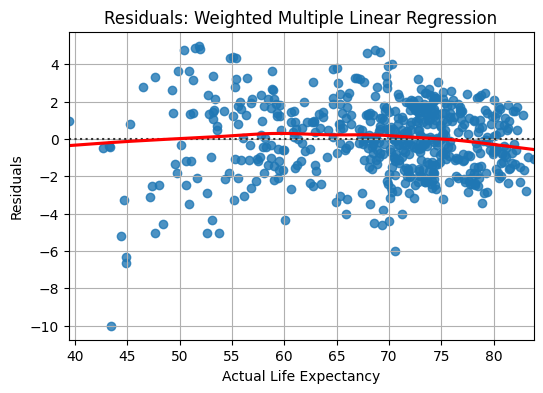

In [ ]:
# assign variables
X_wls = df[features]
y = df['Life_expectancy']

# Calculate weights based on the inverse of the variance of the errors
errors = y - np.mean(y)
error_variance = np.var(errors)
weights = 1 / error_variance

# split the data
X_train_w, X_test_w, y_train_w, y_test_w = train_test_split(X_wls, y, test_size=0.2, random_state=42)

# fit the model
wlr = LinearRegression()
wlr.fit(X_train_w, y_train_w, sample_weight = weights)
y_pred_w = wlr.predict(X_test_w)

# show outcomes
print("=== Weighted Multiple Linear Regression ===")
print("R² Score:", r2_score(y_test_w, y_pred_w))
print("MAE:", mean_absolute_error(y_test_w, y_pred_w))
print("MSE:", mean_squared_error(y_test_w, y_pred_w))
print("RMSE:", np.sqrt(mean_squared_error(y_test_w, y_pred_w)))
coeff_df = pd.DataFrame({'Feature': features, 'Coefficient': mlr.coef_})
print("\nFeature Coefficients:\n", coeff_df)
plt.figure(figsize=(6,4))
sns.residplot(x=y_test_w, y=y_pred_w, lowess=True, line_kws={'color': 'red'})
plt.title('Residuals: Weighted Multiple Linear Regression')
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()


<ipython-input-35-abe3f2f8693a>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test_m - y_pred_m), bins = 16)


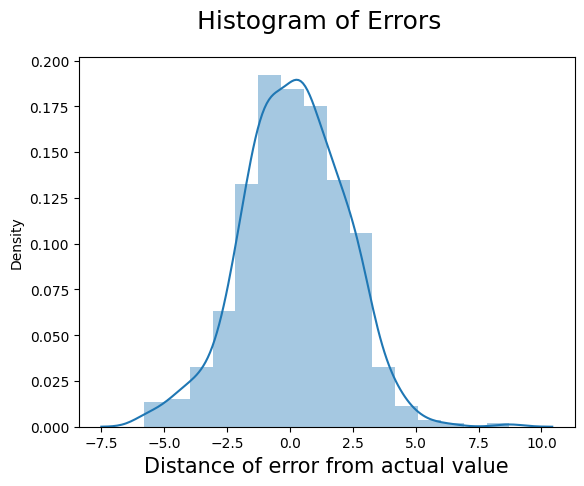

In [ ]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_test_m - y_pred_m), bins = 16)
fig.suptitle('Histogram of Errors', fontsize = 18)
# Plot heading
plt.xlabel('Distance of error from actual value', fontsize = 15)
plt.savefig('HistofErr2.png', bbox_inches = 'tight')

<ipython-input-29-5b0281df96f8>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(RedPlot, hist = False, color = 'r', label = RedName)
<ipython-input-29-5b0281df96f8>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = sns.distplot(BluePlot, hist = False, color = 'b', label = BlueNa

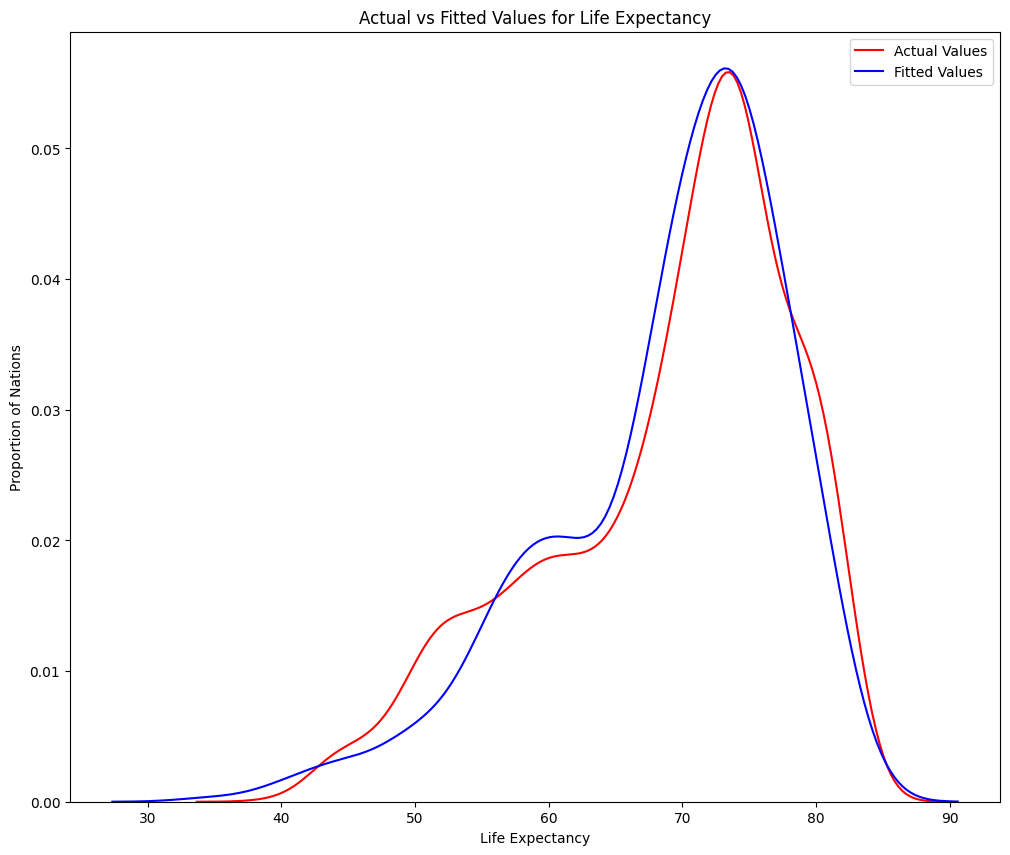

In [ ]:
# Graph distribution plot for this multiple linear regression
Title = 'Actual vs Fitted Values for Life Expectancy'
DistributionPlot(y, y_pred_m, 'Actual Values', 'Fitted Values', Title)

In [ ]:
# Let's check the training group with statsmodel
sm_X = X_train_m
sm_Y = y_train_m
sm_X = sm.add_constant(sm_X)
model = sm.OLS(sm_Y, sm_X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_expectancy   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                 1.050e+04
Date:                Tue, 20 May 2025   Prob (F-statistic):               0.00
Time:                        15:51:31   Log-Likelihood:                -4763.0
No. Observations:                2291   AIC:                             9538.
Df Residuals:                    2285   BIC:                             9573.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  68.8339    

In [ ]:
# Let's check the test group with statsmodel
sm_X_test = X_test_m
sm_Y_test = y_test_m
sm_X_test = sm.add_constant(sm_X_test)
model = sm.OLS(sm_Y_test, sm_X_test).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_expectancy   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     2218.
Date:                Tue, 20 May 2025   Prob (F-statistic):               0.00
Time:                        15:51:31   Log-Likelihood:                -1212.9
No. Observations:                 573   AIC:                             2438.
Df Residuals:                     567   BIC:                             2464.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  69.5801    

# Polynomial Regression Model

From the above model, we can also see an issue with heteroscedasticity. As seen in the residual plot, the variance of the data is not evenly distributed. The variance of the data for life expectancy in the age range 40-65 is more random than 65 and above.

Because linear regression assumes homoscedasticity, we will need to respond appropriately. Because it might be possible that a non-linear model would be an improved approach, we will explore a polynomial regression model.

=== Multiple Linear Regression ===
R² Score: 0.9338616316989613
MAE: 1.7515319112166647
MSE: 5.488902804191788
RMSE: 2.3428407551926758


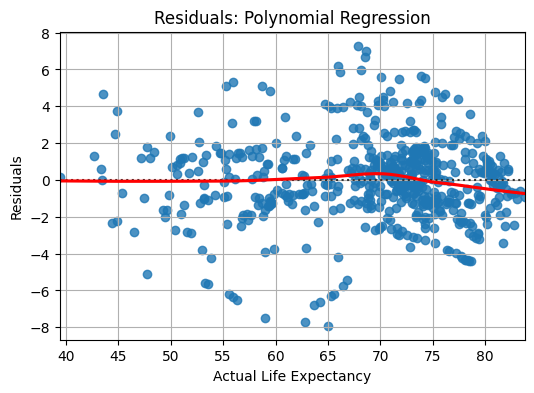

In [ ]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures

# select features from RFE for MLR model
features = ['Infant_deaths', 'Economy_status_Developed', 'Incidents_HIV']
X = df[features]
X_poly = PolynomialFeatures(degree = 3).fit_transform(X)
y = df['Life_expectancy']

# split the data
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# fit the model
poly_reg = LinearRegression()
poly_reg.fit(X_train_p, y_train_p)
y_pred_p = poly_reg.predict(X_test_p)

# show outcomes
print("=== Multiple Linear Regression ===")
print("R² Score:", r2_score(y_test_p, y_pred_p))
print("MAE:", mean_absolute_error(y_test_p, y_pred_p))
print("MSE:", mean_squared_error(y_test_p, y_pred_p))
print("RMSE:", np.sqrt(mean_squared_error(y_test_p, y_pred_p)))
plt.figure(figsize=(6,4))
sns.residplot(x=y_test_p, y=y_pred_p, lowess=True, line_kws={'color': 'red'})
plt.title('Residuals: Polynomial Regression')
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

<ipython-input-41-60cd0874b08a>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test_p - y_pred_p), bins = 16)


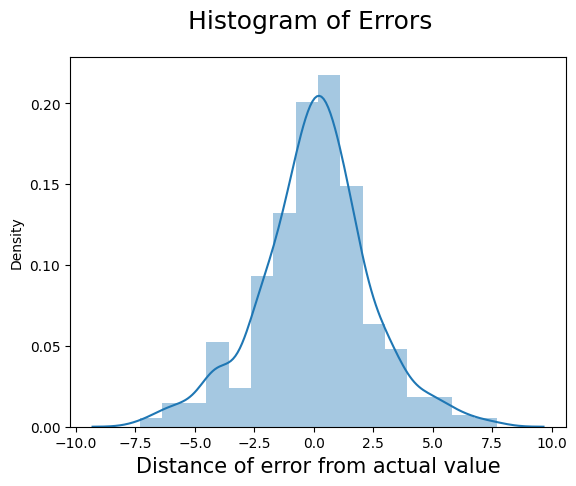

In [ ]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_test_p - y_pred_p), bins = 16)
fig.suptitle('Histogram of Errors', fontsize = 18)
# Plot heading
plt.xlabel('Distance of error from actual value', fontsize = 15)
plt.savefig('HistofErr3.png', bbox_inches = 'tight')

<ipython-input-29-5b0281df96f8>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(RedPlot, hist = False, color = 'r', label = RedName)
<ipython-input-29-5b0281df96f8>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = sns.distplot(BluePlot, hist = False, color = 'b', label = BlueNa

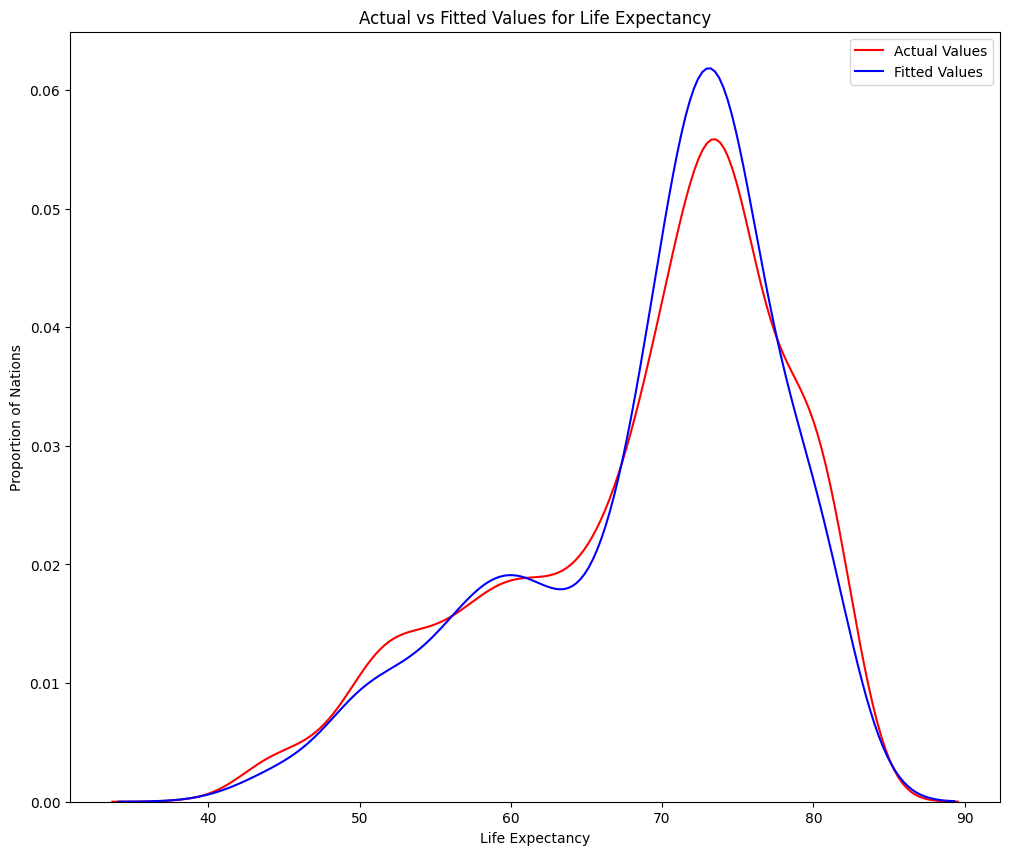

In [ ]:
# Graph distribution plot for this multiple linear regression
Title = 'Actual vs Fitted Values for Life Expectancy'
DistributionPlot(y, y_pred_p, 'Actual Values', 'Fitted Values', Title)

In [ ]:
# Let's check the training group with statsmodel
smX_p = sm.add_constant(X_train_p)
model = sm.OLS(y_train_p, smX_p).fit()
y_pred_p = model.predict(smX_p)
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:        Life_expectancy   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     2262.
Date:                Tue, 20 May 2025   Prob (F-statistic):               0.00
Time:                        15:51:52   Log-Likelihood:                -5232.6
No. Observations:                2291   AIC:                         1.050e+04
Df Residuals:                    2275   BIC:                         1.059e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         78.1681      0.219    357.640      0.0

In [ ]:
# Let's check the training group with statsmodel
smX_p = sm.add_constant(X_test_p)
model = sm.OLS(y_test_p, smX_p).fit()
y_pred_p = model.predict(smX_p)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_expectancy   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     547.6
Date:                Tue, 20 May 2025   Prob (F-statistic):          1.13e-321
Time:                        15:52:15   Log-Likelihood:                -1289.2
No. Observations:                 573   AIC:                             2610.
Df Residuals:                     557   BIC:                             2680.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         78.8101      0.438    180.072      0.0

# Elastic-Net Regression

=== ElasticNet Regression Results ===
R² Score: 0.950
MAE: 1.60 years
RMSE: 2.04 years


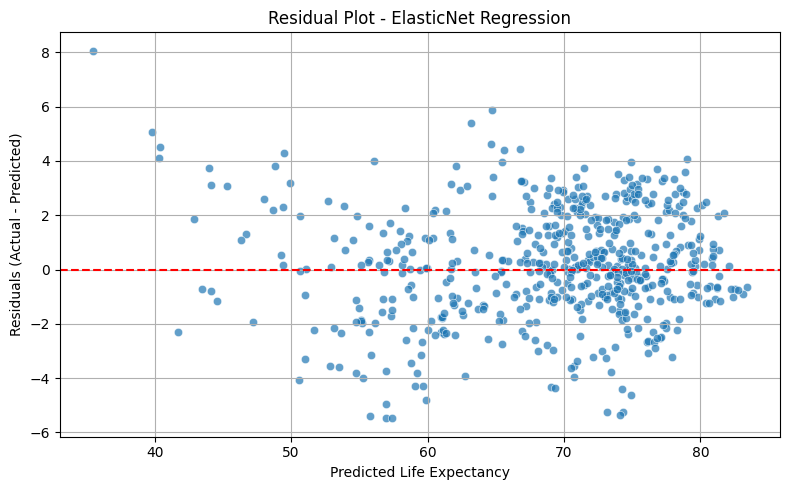

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ---- Features and Target ----
features = ['Polio', 'Adult_mortality', 'GDP_per_capita', 'Schooling']
X = df[features].dropna()
y = df.loc[X.index, 'Life_expectancy']

# ---- Train/Test Split ----
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---- Fit ElasticNet Regression ----
elastic_model = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_model.fit(X_train, y_train)
y_pred_elastic = elastic_model.predict(X_test)

# ---- Evaluation ----
r2 = r2_score(y_test, y_pred_elastic)
mae = mean_absolute_error(y_test, y_pred_elastic)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_elastic))

print("=== ElasticNet Regression Results ===")
print(f"R² Score: {r2:.3f}")
print(f"MAE: {mae:.2f} years")
print(f"RMSE: {rmse:.2f} years")

# ---- Residual Plot ----
residuals = y_test - y_pred_elastic

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred_elastic, y=residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residual Plot - ElasticNet Regression")
plt.xlabel("Predicted Life Expectancy")
plt.ylabel("Residuals (Actual - Predicted)")
plt.grid(True)
plt.tight_layout()
plt.show()


# CHI Square Test

=== Observed Frequencies ===
Economy_status_Developed     0    1
Life_Exp_Level                     
Low                        839    0
Medium                    1127  106
High                       306  486

=== Expected Frequencies ===
Economy_status_Developed           0           1
Life_Exp_Level                                  
Low                       665.575419  173.424581
Medium                    978.134078  254.865922
High                      628.290503  163.709497


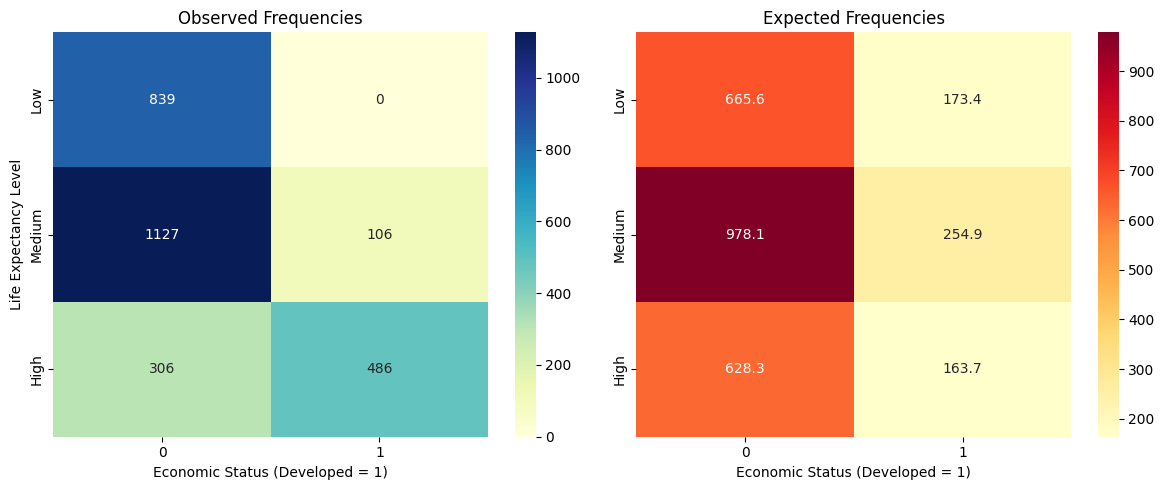

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Classifying life expectancy
df['Life_Exp_Level'] = pd.cut(df['Life_expectancy'], bins=[0, 65, 75, 85], labels=['Low', 'Medium', 'High'])

# Observing the  contingency table
contingency = pd.crosstab(df['Life_Exp_Level'], df['Economy_status_Developed'])

# Performing the Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency)

# Converting the expected to DataFrame
expected_df = pd.DataFrame(expected, index=contingency.index, columns=contingency.columns)

print("=== Observed Frequencies ===")
print(contingency)

print("\n=== Expected Frequencies ===")
print(expected_df)

# Visualisation: Heatmaps
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(contingency, annot=True, fmt="d", cmap="YlGnBu", ax=axes[0])
axes[0].set_title("Observed Frequencies")
axes[0].set_xlabel("Economic Status (Developed = 1)")
axes[0].set_ylabel("Life Expectancy Level")


sns.heatmap(expected_df, annot=True, fmt=".1f", cmap="YlOrRd", ax=axes[1])
axes[1].set_title("Expected Frequencies")
axes[1].set_xlabel("Economic Status (Developed = 1)")
axes[1].set_ylabel("")

plt.tight_layout()
plt.show()


We used the Chi-square test to check if economic status (developed vs developing) is related to life expectancy level (low, medium, high). The test confirmed a strong association, meaning economic status significantly affects how long people live.

Here are our hypotheses:

Null Hypothesis: Life Expectancy and Economic Status are independent.

Alternate Hypothesis: Life Expectancy and Economic Status are NOT independent.


#Conclusion

Based on our findings, features such as higher schooling, greater immunization coverage, and higher GDP per capita were positively associated with life expectancy.

In contrast, adult mortality showed a strong negative impact, meaning that higher adult death rates significantly reduce a population’s average lifespan.


However, some features like alcohol consumption appeared to have a misleading positive influence due to confounding with economic status — especially in developed countries.
To address this, we implemented ElasticNet Regression, which maintained high predictive accuracy (R² = 0.951) while reducing overfitting and limiting the influence of less meaningful predictors.
The final model is more stable, interpretable, and ethically aware, making it suitable for deployment.

#Suggestions On DataSet

We greatly appreciate the value of this dataset in analyzing global life expectancy trends. However, we recommend including clearer definitions and units for variables such as adult mortality and alcohol consumption to improve interpretability. Additionally, the inclusion of important health behavior indicators—such as smoking rates, diet, or access to healthcare—would enhance the dataset’s ability to reflect real-world health outcomes more accurately. Incorporating time-series data and updated post-pandemic figures would also allow for more robust trend analysis. These improvements would significantly increase the dataset’s relevance and reliability for both academic research and policy development.



#Model Deployment

In [ ]:

pip install gradio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.2/54.2 MB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.1/323.1 kB 25.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 106.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 5.7 MB/s eta 0:00:00


In [ ]:
  import joblib

  # Save the model
  joblib.dump(elastic_model, "elasticnet_life_expectancy.pkl")
  from google.colab import files
  files.download("elasticnet_life_expectancy.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import gradio as gr
import joblib
import numpy as np

# Load the retrained ElasticNet model (must match the one you trained without alcohol)
elastic_model = joblib.load("elasticnet_life_expectancy.pkl")

# Define prediction function (matching features: Polio, Adult_mortality, GDP_per_capita, Schooling)
def predict_life_expectancy(polio, adult_mortality, gdp, schooling):
    features = np.array([[polio, adult_mortality, gdp, schooling]])
    prediction = elastic_model.predict(features)
    return f"📘 Predicted Life Expectancy: {prediction[0]:.2f} years"

# Build Gradio UI
with gr.Blocks() as demo:
    gr.Markdown("## 🌍 Life Expectancy Predictor (ElasticNet Regression)")
    gr.Markdown("Estimate average life expectancy based on national development and health factors.")

    polio = gr.Slider(60, 100, value=85, label="Polio Immunization (%)")
    adult_mortality = gr.Slider(50, 800, value=150, label="Adult Mortality Rate (per 1000)")
    gdp = gr.Slider(1000, 100000, value=12000, label="GDP per Capita ($)")
    schooling = gr.Slider(0, 20, value=10, label="Average Years of Schooling")

    output = gr.Textbox(label="Predicted Life Expectancy")
    predict_btn = gr.Button("Predict")

    predict_btn.click(fn=predict_life_expectancy,
                      inputs=[polio, adult_mortality, gdp, schooling],
                      outputs=output)

    gr.Markdown("ℹ️ *Note: This model uses statistical relationships and may not reflect individual-level health outcomes. Use predictions responsibly.*")

# Launch app
demo.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://f1ce8b013949aa307a.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
